In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读入并处理数据集

In [20]:
years = range(1880,2011)
data = []
columns = ['name','sex','births']
# 读入txt文件并新增year列
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    data.append(frame)
#将各个年份的数据拼接起来
names = pd.concat(data, ignore_index=True)

In [21]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692316,Zymaire,M,5,2010
1692317,Zyonne,M,5,2010
1692318,Zyquarius,M,5,2010
1692319,Zyran,M,5,2010


# 提出问题

1.婴儿出生数量的变化趋势  
2.男女性别比例变化趋势  
3.每年的新生儿常见名字  
4.新生儿的姓名是越来越相似还是越来越具有多样性

# 探索性分析

In [22]:
class total_analysis():
    def __init__(self,names):
        self.names = names
    def names_shape(self):
        print(self.names.shape)
    def names_columns(self):
        print(self.names.columns)
    def names_info(self):
        print(self.names.info())
    def names_stat(self):
        print(self.names.describe())
    def names_null(self):
        print(self.names.isnull().any())

In [23]:
names_ana = total_analysis(names)
names_ana.names_shape()
names_ana.names_columns()
names_ana.names_info()
names_ana.names_null()
names_ana.names_stat()

(1692321, 4)
Index(['name', 'sex', 'births', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692321 entries, 0 to 1692320
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB
None
name      False
sex       False
births    False
year      False
dtype: bool
             births          year
count  1.692321e+06  1.692321e+06
mean   1.906467e+02  1.969474e+03
std    1.615999e+03  3.282031e+01
min    5.000000e+00  1.880000e+03
25%    7.000000e+00  1.946000e+03
50%    1.200000e+01  1.979000e+03
75%    3.200000e+01  1.997000e+03
max    9.969300e+04  2.010000e+03


# 深入分析

## 每年新生儿数量分析

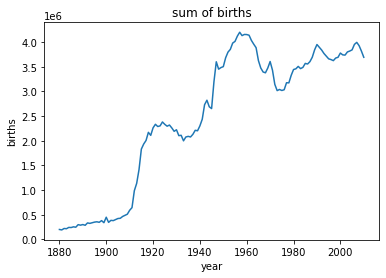

In [26]:
#按照年份对婴儿数量进行汇总并绘制折线图
def sum_of_births(data):
    names_year = data.groupby('year')['births'].sum()
    names_year.plot(xlabel='year',ylabel='births',title='sum of births')
    plt.show()
sum_of_births(names)

## 每年新生儿性别比例分析

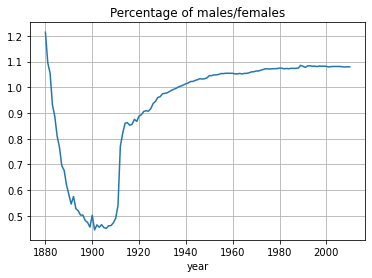

In [41]:
def Percentage(names):
    sex_year = names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
    #新增一列计算性别比例
    sex_year['M/F'] = sex_year['M']/sex_year['F']
    #绘制性别比例变化图
    sex_year['M/F'].plot(grid=True,title='Percentage of males/females')
    plt.show()
Percentage(names)

## 新生儿常见名字分析

In [30]:
#取出每年最常用的名字
def top(dataframe):
    return dataframe.sort_values(by='births',ascending=False).iloc[0]

In [31]:
#查询每年的最常用名字
def top_query(top_gender):
    year = int(input('Please enter the year you want to query:'))
    return top_gender.loc[year]

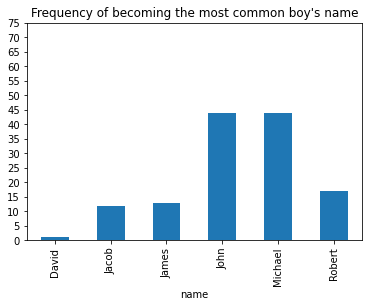

In [42]:
#计算男性名字出现频率并绘图
def top_M(names):
    top_M = names.loc[names.sex == 'M'].groupby('year').apply(top)
    top_M_counts = top_M.groupby('name').size()
    top_M_counts.plot.bar(title='Frequency of becoming the most common boy\'s name',grid=False,yticks=range(0,80,5))
    plt.show()
top_M(names)

In [35]:
top_query(top_M)

Please enter the year you want to query:1895


name      John
sex          M
births    8320
year      1895
Name: 1895, dtype: object

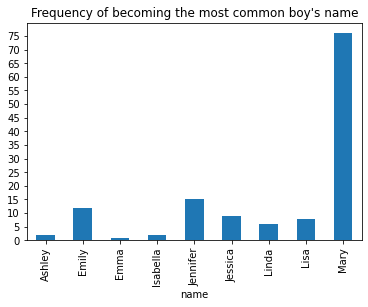

In [43]:
#计算女性名字出现频率并绘图
def top_F(names):
    top_F = names.loc[names.sex == 'F'].groupby('year').apply(top)
    top_F_counts = top_F.groupby('name').size()
    top_F_counts.plot.bar(title='Frequency of becoming the most common boy\'s name',grid=False,yticks=range(0,80,5))
    plt.show()
top_F(names)

In [37]:
top_query(top_F)

Please enter the year you want to query:1952


name      Linda
sex           F
births    67079
year       1952
Name: 1952, dtype: object

## 新生儿姓名多样性分析

In [38]:
#新增一列为每个名字占当年总新生儿数量比例
def ratio(data):
    data['ratio'] = data['births']/data['births'].sum()
    return data

names_ratio = names.groupby('year').apply(ratio)

names_ratio

,name,sex,births,year,ratio
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666
...,...,...,...,...,...
1692316,Zymaire,M,5,2010,0.000001
1692317,Zyonne,M,5,2010,0.000001
1692318,Zyquarius,M,5,2010,0.000001
1692319,Zyran,M,5,2010,0.000001


In [39]:
#计算每年最多的十个姓名占全部婴儿的比例
def top10(data):
    return data['ratio'].sort_values(ascending=False)[:10].sum()

names_top10ratio = names_ratio.groupby('year').apply(top10)
names_top10ratio

year
1880    0.266349
1881    0.255746
1882    0.247268
1883    0.236319
1884    0.227264
          ...   
2006    0.053349
2007    0.051374
2008    0.049542
2009    0.049507
2010    0.050488
Length: 131, dtype: float64

<AxesSubplot:title={'center':'top10 percentage'}, xlabel='year', ylabel='ratio'>

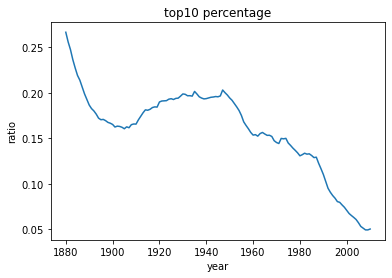

In [40]:
names_top10ratio.plot(xlabel='year',ylabel='ratio',title='top10 percentage')

# 结论

1.在1880-2010年间，美国新生儿数量总体呈现上升的趋势，并在1920达到小波峰，而后在1960年达到顶峰，之后一直至今稳定在每年350万附近  
2.在1880-2010年间，美国新生儿男女比例有着明显的变化，1880到1900年间新生儿男女比例持续下降，最低时仅在0.5附近，而后到1920年间，男女比例迅速增长，并在之后至今的时间内稳步上涨至接近1.1。  
3.在1880-2010年间，男孩常用名为Michael和John,女孩常用名为Mary。  
4.在1880-2010年间，新生儿姓名多样性逐渐增加。  